# Case 1. Heart Disease Classification
**Neural Networks for Machine Learning Applications**<br>
1.2.2023<br>
Team 8. Joona Nylander, Lassi Piispanen, Antti Taponen<br>
[Information Technology, Bachelor's Degree](https://www.metropolia.fi/en/academics/bachelors-degrees/information-technology)<br>
[Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## 1. Introduction

The purpose of this notebook is to document the use of a neural network binary classifier in predicting heart disease based on a set of features in a dataset. The goal is to aim for a high sensitivity without losing specificity.

## 2. Setup

Check the comments in the code block below for information on the setup.

In [ ]:
# Prerequisites for using a kaggle dataset
! pip install -q kaggle                               #Installing the kaggle package
from google.colab import files                        #Importing colab filesystem
files.upload()                                        #For uploading kaggle api token

import pandas as pd                                   #Handling datasets
import tensorflow as tf                               #Building the neural network model
import numpy as np                                    #Extra methods to use with arrays
import matplotlib.pyplot as plt                       #Plotting tool
import seaborn as sns                                 #Plotting tool
from sklearn.model_selection import train_test_split  #Splitting of the data
from sklearn import preprocessing                     #Gor one-hot-encoding and scaler
from sklearn.metrics import confusion_matrix          #To generate confusion matrix

Saving kaggle.json to kaggle.json


## 3. Dataset

The data used in this notebook consists of 21 features and a binary classifier for whether the datapoint is positive for a heart disease. First the data is downloaded from kaggle ([data source](https://www.kaggle.com/code/alexteboul/heart-disease-health-indicators-dataset-notebook/notebook)) to Google colab. The original dataset used by the author of the data we are using in this notebook has been somewhat preprocessed and generally these actions include:
*   Dropped missing values
*   Some categorical features from  have been transformed into a binary form where possible
*   Some categorical features have had irrelevant categories deleted or merged
*   Renamed feature names to be more readable

The original data is provided by Centers for Disease Control and Prevention (CDC) it is called The Behavioral Risk Factor Surveillance System (BRFSS). It's collected via a phone survey in the United States of America.


####Importing the data from Kaggle into a variable df:

In [ ]:
# Remove previous kaggle directories
! rm -r ~/.kaggle

# Make directory named kaggle and copy kaggle.json there
! mkdir ~/.kaggle
! cp ./kaggle.json ~/.kaggle/

# Change the permission of the file
! chmod 600 ~/.kaggle/kaggle.json

# Remove previous versions of dataset files
! rm -r input

# Case 1 dataset
! kaggle datasets download -d alexteboul/heart-disease-health-indicators-dataset
! unzip heart-disease-health-indicators-dataset.zip -d input
! rm heart-disease-health-indicators-dataset.zip

df = pd.read_csv('./input/heart_disease_health_indicators_BRFSS2015.csv')

rm: cannot remove '/root/.kaggle': No such file or directory
rm: cannot remove 'input': No such file or directory
  0% 0.00/2.66M [00:00<?, ?B/s]
100% 2.66M/2.66M [00:00<00:00, 126MB/s]
Archive:  heart-disease-health-indicators-dataset.zip
  inflating: input/heart_disease_health_indicators_BRFSS2015.csv  


Contents of df described:

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


A glance at what the feature values actually look like:

In [ ]:
features = df.drop(['HeartDiseaseorAttack'], axis = 1)
features.head(10).T

,0,1,2,3,4,5,6,7,8,9
HighBP,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
HighChol,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
CholCheck,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BMI,40.0,25.0,28.0,27.0,24.0,25.0,30.0,25.0,30.0,24.0
Smoker,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
Stroke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Diabetes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
PhysActivity,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
Fruits,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
Veggies,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


The counts for each feature's unique values are listed to ease the sorting.

In [ ]:
for x in range(0,22):
  uniques, counts = np.unique(df[df.columns.values[x]], return_counts=True)
  print(f'\n{df.columns.values[x]} contains {len(uniques)} values')


HeartDiseaseorAttack contains 2 values

HighBP contains 2 values

HighChol contains 2 values

CholCheck contains 2 values

BMI contains 84 values

Smoker contains 2 values

Stroke contains 2 values

Diabetes contains 3 values

PhysActivity contains 2 values

Fruits contains 2 values

Veggies contains 2 values

HvyAlcoholConsump contains 2 values

AnyHealthcare contains 2 values

NoDocbcCost contains 2 values

GenHlth contains 5 values

MentHlth contains 31 values

PhysHlth contains 31 values

DiffWalk contains 2 values

Sex contains 2 values

Age contains 13 values

Education contains 6 values

Income contains 8 values


####The sorting of the features:

The features are sorted into a binary, a numerical and a categorical set. The data source and the comments there were also used to help in the sorting of the features.

In [ ]:
bin_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex']
num_features = ['BMI', 'MentHlth', 'PhysHlth']
cat_features = ['Diabetes', 'GenHlth', 'Age', 'Education', 'Income']

####Visualization of the original data:

Visualization for the binary features:

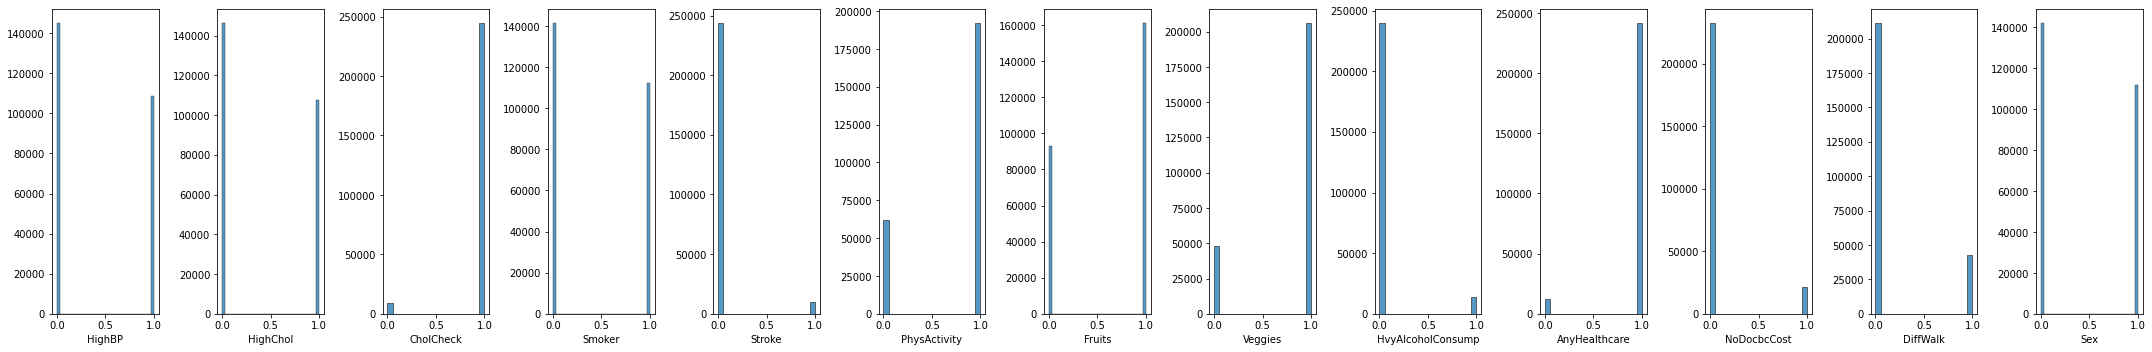

In [ ]:
N = len(bin_features)
fig, axs = plt.subplots(1, N, figsize=(30, 5))

for n in range(N):
    sns.histplot(data=features, x=bin_features[n], ax=axs[n])
    axs[n].set_ylabel('')
plt.tight_layout()
plt.show()

Visualizations for the categorical features:

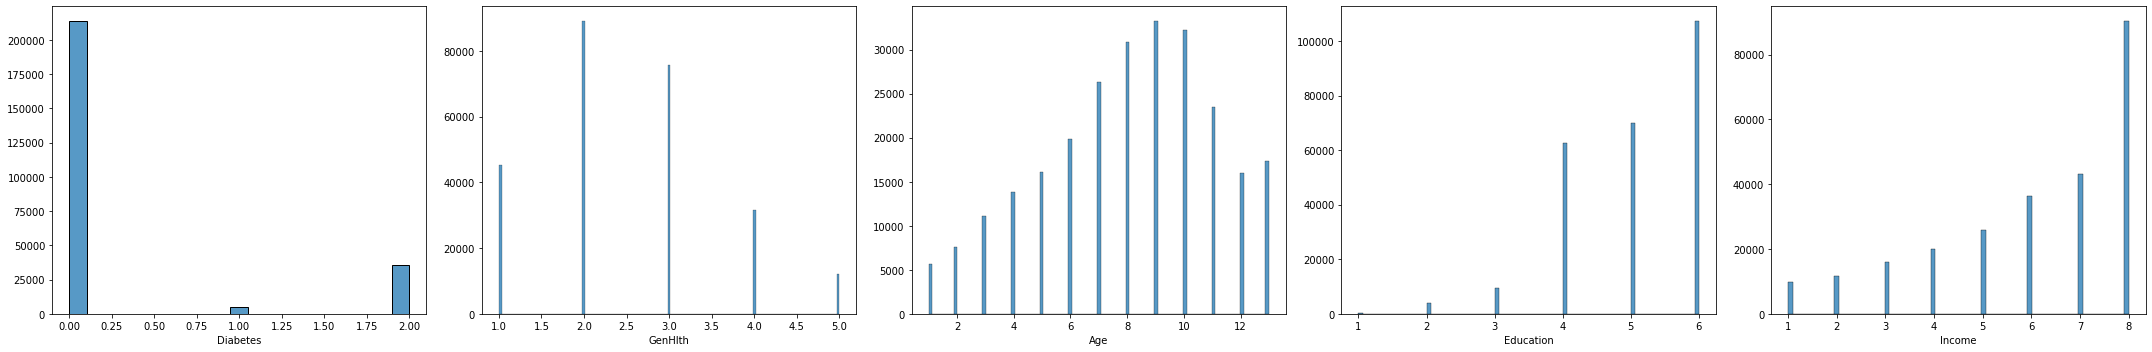

In [ ]:
N = len(cat_features)
fig, axs = plt.subplots(1, N, figsize=(30, 5))
for n in range(N):
    sns.histplot(data=features, x=cat_features[n], ax=axs[n])
    axs[n].set_ylabel('')
plt.tight_layout()
plt.show()

A visualization for the numerical features:

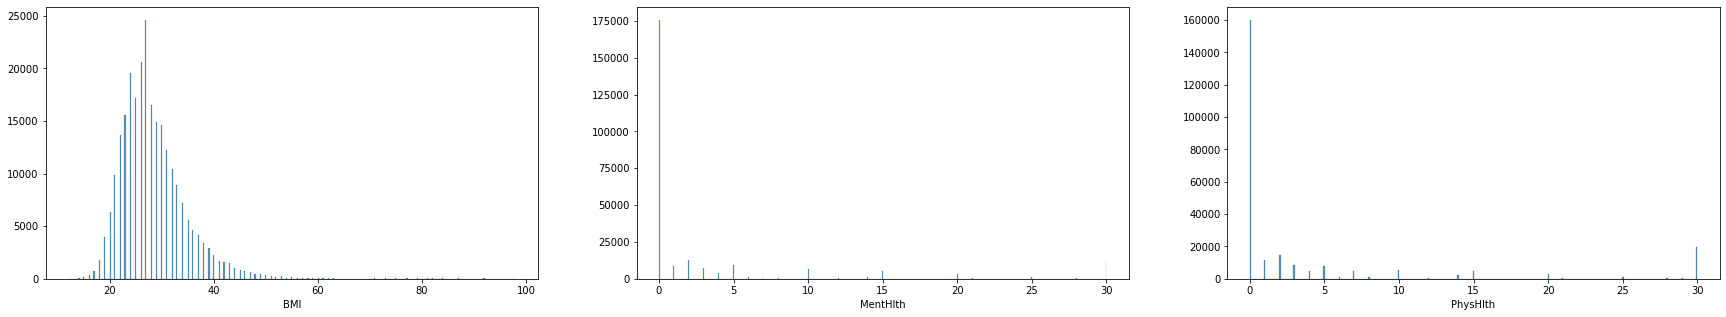

In [ ]:
N = len(num_features)
fig, axs = plt.subplots(1, N, figsize=(30, 5))

for n in range(N):
    sns.histplot(data=features, x=num_features[n], ax=axs[n])
    axs[n].set_ylabel('')
plt.show()

##4. Preprocessing


Steps taken in the the preprocessing:
- Categorical features are "one hot encoded".
- Numerical features are normalized instead of standardized as they are not normal distributed.
- Data is balanced with weights.
- The data is split into a validation set, test set, training set and the corresponding label sets.
- The input features are all the sorted features specified earlier and as the output or labels there are classes denoted by 0 and 1 where 0 means a healthy person and a 1 means a person suffering from heart disease.


Explanations on standard preprocessing phases skipped:
- As the missing values had already been dealt with by the source of the dataset it wasn't necessery to take action here.
- About cleaning the BMI curve, We evaluated that even though the values for the BMI feature have statistical outliers, maximum being 98. As these values are not impossible, nor does BMI follow a normal curve, the dataset will not be further diminished by us. In the description of the original dataset it is explained that some cleaning of possible error values has already been carried out. <br>(Source: page 8 of  [CDC's BRFSS overview](https://www.cdc.gov/brfss/annual_data/2015/pdf/overview_2015.pdf).)

####Preprocessing input

- HeartDiseaseorAttack is a binary feature which implies if the answerer have had a heart disease or attack.
- HighBP is a binary feature which implies if the answerer has a high blood pressure or not.
- HighChol is a binary feature which implies if the answerer has a high cholesterol values or not.
- CholCheck is a binary feature which implies if the answerer has had a cholesterol check-up within the past 5 years.
- BMI is a a numerical feature, represents BMI of the answerer.
- Smoker is a binary feature which tells if the person smokes or not.
- Diabetes is a categorical feature which implies if the answerer has diabetes or not. Also, if person has diabetes, it is specified if it is type 1 or 2 diabetes.
- PhysActivity is a binary feature which tells if the answerer does any physical activity.
- Fruits is a a binary feature which implies if the answerer eats any fruits.
- Veggies is a binary feature which implies if the answerer eats any vegetables.
- HvyAlcoholConsump is a binary feature which implies if the answerer is a heavy alcohol consumer.
- AnyHealthcare is a binary feature which tells if the answerer has any kind of medical insurance or goverment subsided health plans.
- NoDocbcCost is a binary feature which tells if the answerer has had a need for a doctor but couldn't do so because of the cost in the past 12 months.
- GenHlth is a categorical feature where the answerer evaluates his/her general health from 1-5.
- MentHlth represents the amount of days in the last 30 days where the answerer had bad days mental health-wise.
- PhysHlth represents the amount of days in the last 30 days where the answerer had bad days physical health-wise.
- DiffWalk is a binary feature which tells if the answerer has any difficulties walking or climbing stairs.
- Sex is a binary feature representing the sex of the answerer.
- Age is a categorical feature about the age group of the answerer. An age group has 5 ages in them and there are 14 groups.
- Education is a categorical feature about the education level of the answerer.
- Income is a categorical feature about the level of income of the answerer.


#### Preprocessing output


What we get as the output of the preprocessing stage is training data, validation data and also the test data. Our naming convention is so that word data could be interpreted as "X" and labels as "Y".
- train_data
- train_labels
- valid_data
- valid_labels
- test_data
- test_labels

###Procedures:

All the binary features in the dataframe are combined to their own array.

In [ ]:
bin_values = features[bin_features].values
bin_values[:5]

array([[1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.],
       [1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.]])

The numeric features in the dataframe are stored to their own array.

In [ ]:
num_values = features[num_features].values
print(num_values[:5])

[[40. 18. 15.]
 [25.  0.  0.]
 [28. 30. 30.]
 [27.  0.  0.]
 [24.  3.  0.]]


The categorical features in the dataframe are one hot encoded and combined into a single array.

In [ ]:
encoder = preprocessing.OneHotEncoder().fit(features[cat_features])
cat_values = encoder.transform(features[cat_features]).toarray()
cat_values[:2]

array([[1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0.]])

Dimensions of the arrays containing the sorted features.

In [ ]:
bin_values.shape, num_values.shape, cat_values.shape

((253680, 13), (253680, 3), (253680, 35))

The data is split into validation data, training data, test data and the corresponding labels

In [ ]:
data = np.concatenate((bin_values, num_values, cat_values), axis = 1)
labels = df['HeartDiseaseorAttack']

# In the first step we will split the data in training and remaining dataset
train_data, rem_data, train_labels, rem_labels = train_test_split(data, labels, train_size = 0.64)
valid_data, test_data, valid_labels, test_labels = train_test_split(rem_data, rem_labels, test_size = 0.2)

The numerical features are scaled with a minmax scaler as none of them are normal distributed. The scaling of the numerical value takes place after splitting so no information from test or validation data spill into the training data

In [ ]:
transformerBMI = preprocessing.MinMaxScaler()
transformerBMI.fit(train_data[:,13].reshape(-1, 1))  # Fit scaler with train_data

transformer30 = preprocessing.MinMaxScaler()
transformer30.fit(train_data[:,14:16].reshape(-1, 1))  # Fit scaler with train_data

train_data[:,13] = transformerBMI.transform(train_data[:,13].reshape(-1, 1)).reshape(len(train_data[:,13]),) # Normalize BMI in train_data
valid_data[:,13] = transformerBMI.transform(valid_data[:,13].reshape(-1, 1)).reshape(len(valid_data[:,13]),) # Normalize BMI in valid_data
test_data[:,13] = transformerBMI.transform(test_data[:,13].reshape(-1, 1)).reshape(len(test_data[:,13]),)    # Normalize BMI in test_data

train_data[:,14] = transformer30.transform(train_data[:,14].reshape(-1, 1)).reshape(len(train_data[:,14]),) # Normalize MentHlth in train_data
valid_data[:,14] = transformer30.transform(valid_data[:,14].reshape(-1, 1)).reshape(len(valid_data[:,14]),) # Normalize MentHlth in valid_data
test_data[:,14] = transformer30.transform(test_data[:,14].reshape(-1, 1)).reshape(len(test_data[:,14]),)    # Normalize MentHlth in test_data

train_data[:,15] = transformer30.transform(train_data[:,15].reshape(-1, 1)).reshape(len(train_data[:,15]),) # Normalize PhysHlth in train_data
valid_data[:,15] = transformer30.transform(valid_data[:,15].reshape(-1, 1)).reshape(len(valid_data[:,15]),) # Normalize PhysHlth in valid_data
test_data[:,15] = transformer30.transform(test_data[:,15].reshape(-1, 1)).reshape(len(test_data[:,15]),)    # Normalize PhysHlth in test_data

The weights for each class are stored as weight0 and weight1. These are the percentages of the classes from the full dataset:

In [ ]:
values, counts = np.unique(train_labels, return_counts = True)
healthy = counts[0]
disease = counts[1]
total = healthy + disease
print('Class 0:', 100*healthy/total, '%')
print('Class 1:', 100*disease/total, '%')

weight0 = 1/healthy*(total/2.0)
weight1 = 1/disease*(total/2.0)
class_weight = {0: weight0, 1: weight1}

Class 0: 90.50167842074467 %
Class 1: 9.498321579255336 %


## 5. Modeling

The model architecture:
- Neuron count: A single dense layer with 45 neurons seemed to provide the best results based on testing. (Different neuron counts for both a single layer and a double layer model were tested on a relative fast compiling version and the model with the highest sum of validated sensitivity and specificity was chosen as the model to be optimized further)
- Activation function: Relu provided marginally better results compared to sigmoid
- A dropout layer with a drop percentage of 10 seemed to provide good results while fending off overfitting.

In [ ]:
input_columns=np.shape(train_data)[1]

model = tf.keras.models.Sequential([
tf.keras.layers.Dense(45, activation='relu', input_shape=(input_columns,)),
tf.keras.layers.Dropout(0.1),
tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 45)                2340      
                                                                 
 dropout (Dropout)           (None, 45)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 46        
                                                                 
Total params: 2,386
Trainable params: 2,386
Non-trainable params: 0
_________________________________________________________________


Compiling the model:
- Optimizer "adam" was chosen because it performed as good as or better than "nadam" or "rms prop".
- The loss function "binary_crossentropy" is the obvious choice for a binary classification problem.
- As the metric we tracked accuracy and recall during building but these dont affect the results and do not even show up on the final version of this notebook.

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['Accuracy','Recall'])

## 6. Training

Here the neural network model is trained based on the training data and labels (train_data, train_labels). To test the model's capability it also receives the validation data and the labels as input which are not used in the training itself.<br>
In order to get a relatively stable loss trend the batch size was increased to 20000 as with the default value for it the loss was extremely volatile. A volatile loss made the results from different training runs of the same model vary a lot.<br>
Training the current model takes around 61 seconds.<br><br>
We ran an extensive test run with 10000 epochs and a dropout value of 0 to find where the validation loss would start to trend upwards but as the graph below shows it wasn't feasible to pinpoint with our explorative method.
<br>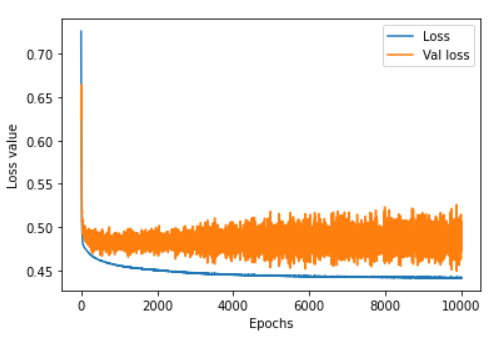

In [ ]:
hist = model.fit(train_data, train_labels, batch_size = 20000, epochs = 200, class_weight=class_weight, validation_data=(valid_data, valid_labels), verbose=0)

Creating the confusion matrix and getting the sensitivity and specificity values for the validation data in order to gauge the model.

In [ ]:
predictions = model.predict(valid_data, verbose=0) # for eg: [2, 2, 4]
y = (predictions > 0.5).astype(np.float32)
confusion = confusion_matrix(valid_labels, y)

Sensitivity and specificity from the validation labels.

In [ ]:
print("Sensitivity: ", confusion[1,1]/(confusion[1,0]+confusion[1,1]))   # Sensitivity
print("Specificity: ", confusion[0,0]/(confusion[0,0]+confusion[0,1]))   # Specificity

Sensitivity:  0.8201502430402121
Specificity:  0.7303496250245205


## 7. Performance and evaluation

Here a loss and an accuracy graph are evaluated and a final model is built where validation data and trainind data are combined and test data is used to validate the final model.

The loss graph<br>
It seems there is still a slight downward trend for the training loss at 200 epochs where we decided to end our training. We interpreted this as underfitting but as the validation loss seemed to have stagnated we decided this was a good place to end the training. Increasing the dropout factor could be a way to get a cleaner cutoff point but we decided that reaching the best possible sensitivity and specificity was our goal and not a clean graph. The best results were reached with a dropout of 10%.

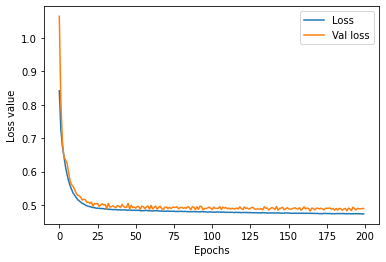

In [ ]:
# Loss graph
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.legend()
plt.show()

Accuracy graphs seems very clean as the training accuracy is almost the same as the validation accuracy. This tells us that the dropout is doing it's job at keeping the model generic.

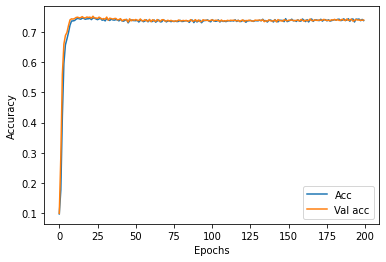

In [ ]:
# Accuracy graph
plt.plot(hist.history['Accuracy'], label='Acc')
plt.plot(hist.history['val_Accuracy'], label='Val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Rebuilding the whole model for testing with both the training and the validation data as training data and finally validating with the test data

In [ ]:
# Combine train_data and valid_data for second training round
combined_data = np.concatenate((train_data, valid_data), axis=0)
combined_labels = np.concatenate((train_labels, valid_labels), axis=0)

input_columns=np.shape(train_data)[1]
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(45, activation='relu', input_shape=(input_columns,)),
tf.keras.layers.Dropout(0.1),
tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['Accuracy','Recall'])

hist2 = model.fit(combined_data, combined_labels, batch_size = 20000, epochs = 200, class_weight=class_weight, verbose=0)

Generic outputs of the final model:

In [ ]:
model.evaluate(test_data, test_labels, verbose=2)

571/571 - 1s - loss: 0.4798 - Accuracy: 0.7405 - recall: 0.8414 - 896ms/epoch - 2ms/step


[0.4798445701599121, 0.740487277507782, 0.8413547277450562]

In [ ]:
test_predictions = model.predict(test_data, verbose=0) # for eg: [2, 2, 4]
test_y = (test_predictions > 0.5).astype(np.float32)
test_confusion = confusion_matrix(test_labels, test_y)
print('Confusion matrix: \n', test_confusion, sep="")

Confusion matrix: 
[[12109  4473]
 [  267  1416]]


Final sensitivity and specificity from the test labels.

In [ ]:
print("Sensitivity: ", test_confusion[1,1]/(test_confusion[1,0]+test_confusion[1,1]))   # Sensitivity
print("Specificity: ", test_confusion[0,0]/(test_confusion[0,0]+test_confusion[0,1]))   # Specificity

Sensitivity:  0.8413547237076648
Specificity:  0.7302496683150405


## 8. Discussion and conclusions

###The testing:
Many different models and settings were tried before establishing the final model presented here. All but the last two tests were conducted with a fast training process containing only 4 epochs. As a metric for the "goodness" of the model for these tests a simple sum on sensitivity and specificity was used as maximizing both was the goal. These tests were done by hand and to lessen the variablitiy of the results a mean of the sensitivity and specifity sums over two runs were used.

Tests conducted:
1. Layer count. Both single and double hidden layer models were tested.
2. Activation function. ReLU or Sigmoid were tested as activation functions.
3. The neuron count. In the case of two layers, only layers of the same size were tested.
4. Two different ways of sampling to combat the imbalanced data. These sampling methods were "SMOTE" and the class weight approach.
5. Optimizers adam, nadam and rms-prop were tested.
6. The dropout percentage
7. The epoch count.
8. The Batch size.

Test results:
1. Layer count, A single layer ended up giving better results. (There is a possibility that the 4 epochs were not anough to train a more complex model with 2 layers and that is why a single layer performed better).
2. Activation function, ReLU provided marginally better results-
3. Neuron count, 45 seemed to perform the best. 
4. Sampling methods, the class weight method seemed worse for accuracy but better for specificity and sensitivity so we used it.
5. Optimizer, adam was chosen
6. A dropout percentage of 10 yielded the best results.
7. Epoch count, 200 was somewhat of a compromize as the loss value of the training set still seemed to go down at that point. The sensitivity and specificity on longer runs was at best similiar to on a run with 200 epochs so we settled on it.
8. The Batch size was increased to 20000 as the validation loss was very volatile with the default values and we estimated this was due to the very inbalanced classes.

Some of the previous model setups had higher overall accuracy metric but their sensitivity and specificity metrics were lower. This was due to the class inbalance as ~90.5% of the observations were of a single class. So to reach an accuracy of 0.905 all the model has to do is predict that majority class every time.


###Results:
To summarize the best achieving model consisted of a single dense hidden layer and an output layer. The model's hidden layer consists of 45 neurons and the activation function used for it is ReLU. The activation layer has 1 neuron using Sigmoid for binary classification output. The model is compiled with adam as the optimizer and binary crossentropy as the loss function.

The final achieved performance with the test data:

| Accuracy | Recall | Loss   | Sensitivity        | Specificity |
| -------- | ------ | ------ | ------------------ | ----------- |
| 0.7405   | 0.8414 | 0.4763 | 0.8413547277450562 | 0.740487277507782 |

As a baseline to compare our result to we concider a model that classifies everyting as members of the majority class. This model would have mean sensitivity and specificity of ~0.453.


Comparing the means of the sensitivity and specificity produced by our model to the baseline:
- This model's mean is ~0,791
- Baseline mean of ~0.453


Comparing the mean values implies that the neural network model performs quite a bit better than a dummy model in relation to the goal set for this project. So we deem this model useful.

###Main observations and learning points
Our main observations were about how imbalanced the data was and how to work with that and also how the epoch amount is not a trivial aspect of training the model.

Our learning points were about how to sample imbalanced data and build a neural network for a binary classification problem. We also learned how to use validation data for the training procedure as well as the concept of the additional test data. The time used for the process of testing different hyperparameters would be diminished a great deal if the building of the testing model was done in a "for loop" that just outputs an array with all the relevant information while finetuning the parameters based on input.


###How the model could be improved in future
Firstly, we had a bit of trouble with categorizing some of the features. We weren't exactly sure if some of the features should be categorized as categorical or numeral features. So it would probably be beneficial to redo that part and learn more about using ordinal variables for a neural network. Creating an individually customized dataset from the original BRFSS dataset as well as categorizing it as we see fit might prove useful instead of using the ready made one.

Secondly, more data never hurts and as this neural network is built only on the 2015 BRFSS questionnaire dataset, there are a lot more data available for use if additional years are included.